In [37]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_dir_train = pathlib.Path(r"C:\Users\chaih\OneDrive\Documents\UpGrad\inputs\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r"C:\Users\chaih\OneDrive\Documents\UpGrad\inputs\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    subset="training",
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    subset="validation",
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
num_class = 9
model1 = Sequential([
    layers.Rescaling(scale=1./255, input_shape=(180,180,3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_class)
])



In [10]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 64)      18496     
                                                                 
 flatten (Flatten)           (None, 2073600)           0         
                                                                 
 dense (Dense)               (None, 128)               265420928 
                                                                 
 dense_1 (Dense)             (None, 9)                 1

In [12]:
epochs = 20
history = model1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/20
56/56 [==============================] - 107s 2s/step - loss: 8.2080 - accuracy: 0.1585 - val_loss: 7.9136 - val_accuracy: 0.1790
Epoch 2/20
56/56 [==============================] - 101s 2s/step - loss: 8.2312 - accuracy: 0.1546 - val_loss: 7.9136 - val_accuracy: 0.1790
Epoch 3/20
56/56 [==============================] - 107s 2s/step - loss: 8.2312 - accuracy: 0.1546 - val_loss: 7.9136 - val_accuracy: 0.1790
Epoch 4/20
56/56 [==============================] - 104s 2s/step - loss: 8.2312 - accuracy: 0.1546 - val_loss: 7.9136 - val_accuracy: 0.1790
Epoch 5/20
56/56 [==============================] - 105s 2s/step - loss: 8.2312 - accuracy: 0.1546 - val_loss: 7.9136 - val_accuracy: 0.1790
Epoch 6/20
56/56 [==============================] - 103s 2s/step - loss: 8.2312 - accuracy: 0.1546 - val_loss: 7.9136 - val_accuracy: 0.1790
Epoch 7/20
56/56 [==============================] - 104s 2s/step - loss: 8.2312 - accuracy: 0.1546 - val_loss: 7.9136 - val_accuracy: 0.1790
Epoch 8/20
56

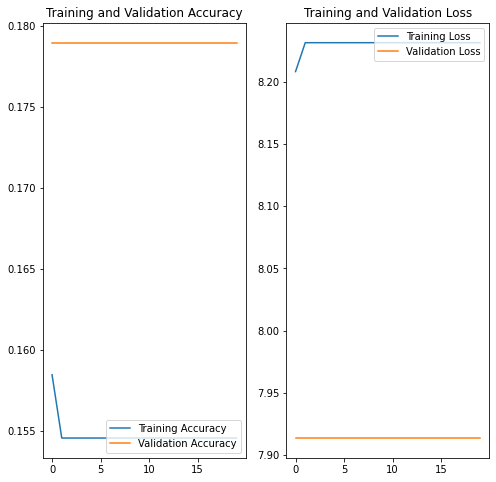

In [14]:
acc = hostory.history['accuracy']
val_acc = hostory.history['val_accuracy']

loss = hostory.history['loss']
val_loss = hostory.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [21]:
for img in train_ds.take(1):
    aug_img = data_augmentation(img)

array([[[[ 43.666664 ,  17.416666 ,  28.541666 ],
         [ 46.5      ,  18.125    ,  29.       ],
         [ 53.916664 ,  23.041666 ,  33.666664 ],
         ...,
         [100.708405 ,  46.12503  ,  61.666748 ],
         [ 94.375    ,  42.625    ,  59.       ],
         [ 88.00006  ,  39.416687 ,  56.166687 ]],

        [[ 42.5      ,  21.125    ,  30.375    ],
         [ 48.5      ,  21.375    ,  32.75     ],
         [ 53.75     ,  23.75     ,  32.75     ],
         ...,
         [103.70828  ,  50.12497  ,  67.66681  ],
         [ 98.75     ,  46.5      ,  63.375    ],
         [ 93.54173  ,  44.541702 ,  60.791702 ]],

        [[ 45.291668 ,  18.958332 ,  30.       ],
         [ 51.25     ,  23.25     ,  34.5      ],
         [ 58.25     ,  23.666668 ,  37.125    ],
         ...,
         [109.083496 ,  52.833313 ,  69.62503  ],
         [105.5      ,  50.75     ,  69.25     ],
         [ 92.37508  ,  40.50003  ,  57.75     ]],

        ...,

        [[ 66.79167  ,  29.875    ,  4

InvalidArgumentError: Exception encountered when calling layer "random_flip_2" "                 f"(type RandomFlip).

cannot compute Pack as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:Pack] name: packed

Call arguments received by layer "random_flip_2" "                 f"(type RandomFlip):
  • inputs=('tf.Tensor(shape=(32, 180, 180, 3), dtype=float32)', 'tf.Tensor(shape=(32,), dtype=int32)')
  • training=True

In [22]:
# resize_and_rescale = tf.keras.Sequential([
#   layers.Resizing(180, 180),
#   layers.Rescaling(1./255)
# ])

In [34]:
model2 = tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(scale=1./255, input_shape=(180,180,3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_class)
])

In [35]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
epochs = 20
history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/20
56/56 [==============================] - 109s 2s/step - loss: 9.0781 - accuracy: 0.1708 - val_loss: 9.1096 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 103s 2s/step - loss: 8.9939 - accuracy: 0.1724 - val_loss: 9.1096 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 101s 2s/step - loss: 8.9939 - accuracy: 0.1724 - val_loss: 9.1096 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 98s 2s/step - loss: 8.9939 - accuracy: 0.1724 - val_loss: 9.1096 - val_accuracy: 0.1499
Epoch 5/20
56/56 [==============================] - 98s 2s/step - loss: 8.9939 - accuracy: 0.1724 - val_loss: 9.1096 - val_accuracy: 0.1499
Epoch 6/20
56/56 [==============================] - 103s 2s/step - loss: 8.9939 - accuracy: 0.1724 - val_loss: 9.1096 - val_accuracy: 0.1499
Epoch 7/20
56/56 [==============================] - 103s 2s/step - loss: 8.9939 - accuracy: 0.1724 - val_loss: 9.1096 - val_accuracy: 0.1499
Epoch 8/20
56/5

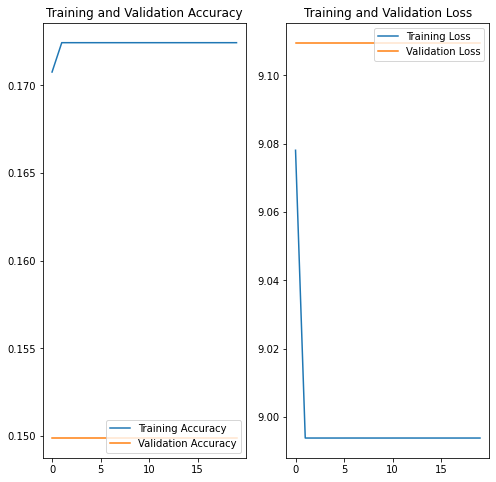

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [96]:
import glob

import os

rootdir = os.getcwd()

# for subdir, dirs, files in os.walk(r"C:\Users\chaih\OneDrive\Documents\UpGrad\inputs\CNN\CNN_assignment\Skin_cancer_Skin_Imaging\Train"):
#     for file in files:
#         filepath = subdir + os.sep + file
#         if filepath.endswith(".jpg"):
#             print (filepath)
            
            
path_to_training_dataset=r"C:\Users\chaih\OneDrive\Documents\UpGrad\inputs\CNN\CNN_assignment\Skin_cancer_Skin_Imaging\Train"
# for filename in glob.iglob(path_to_training_dataset,recursive=True):
# #     print(filename)
#     for filename in glob.iglob(path_to_training_dataset+filename,recursive=True):
#         print(filename)

import Augmentor
for subdir, dirs, files in os.walk(r"C:\Users\chaih\OneDrive\Documents\UpGrad\inputs\CNN\CNN_assignment\Skin_cancer_Skin_Imaging\Train"):
    for file in files:
        filepath = subdir + os.sep + file
        print("filepath", filepath)
        print("file", file)

        if filepath.endswith(".jpg"):
            p = Augmentor.Pipeline(filepath)
            p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
            p.sample(500)

filepath C:\Users\chaih\OneDrive\Documents\UpGrad\inputs\CNN\CNN_assignment\Skin_cancer_Skin_Imaging\Train\actinic keratosis\ISIC_0025780.jpg
file ISIC_0025780.jpg
Insufficient rights to read or write output directory (C:\Users\chaih\OneDrive\Documents\UpGrad\inputs\CNN\CNN_assignment\Skin_cancer_Skin_Imaging\Train\actinic keratosis\ISIC_0025780.jpg\output)
Initialised with 0 image(s) found.
Output directory set to C:\Users\chaih\OneDrive\Documents\UpGrad\inputs\CNN\CNN_assignment\Skin_cancer_Skin_Imaging\Train\actinic keratosis\ISIC_0025780.jpg\output.

IndexError: There are no images in the pipeline. Add a directory using add_directory(), pointing it to a directory containing images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))


In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()


In [ ]:
data_dir_train="C:\Users\chaih\OneDrive\Documents\UpGrad\inputs\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
model3 = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_class)
])

In [ ]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 20
history = model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)